Author: Andrew Scott

In [1]:
# Package for numerical calculations and arrays
import numpy as np

# Accessing datasets
import statsmodels.api as sm

# For dataframes
import pandas as pd

# Generating plots
import matplotlib.pyplot as plt

# Generating plots 
import seaborn as sns

# For accessing dates and times
import datetime as dt

# A magic command for helping display matplotlib plots in notebooks
%matplotlib inline

The plan is to use a real-world dataset to serve as a model for the simulated dataset. I have decided to simulate the following dataset that was originally published by Ronald Fisher that consists of cats and their gender, weight, and heart weight[x]. The dataset is part of the MASS package for the programming language R. However, these datasets can be accessed in python using the statsmodel package. https://kolesnikov.ga/Datasets_in_Python/

In [2]:
# Load the cats dataset 
cats = sm.datasets.get_rdataset(dataname='cats', package='MASS')

In [3]:
# Prnt some information about the dataset 
print(cats.__doc__)

.. container::

   ==== ===============
   cats R Documentation
   ==== ===============

   .. rubric:: Anatomical Data from Domestic Cats
      :name: anatomical-data-from-domestic-cats

   .. rubric:: Description
      :name: description

   The heart and body weights of samples of male and female cats used
   for *digitalis* experiments. The cats were all adult, over 2 kg body
   weight.

   .. rubric:: Usage
      :name: usage

   ::

      cats

   .. rubric:: Format
      :name: format

   This data frame contains the following columns:

   ``Sex``
      sex: Factor with levels ``"F"`` and ``"M"``.

   ``Bwt``
      body weight in kg.

   ``Hwt``
      heart weight in g.

   .. rubric:: Source
      :name: source

   R. A. Fisher (1947) The analysis of covariance method for the
   relation between a part and the whole, *Biometrics* **3**, 65–68.

   .. rubric:: References
      :name: references

   Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics
   with S.* F

In [4]:
# Load the cats dataset to a pandas dataframe
df_cats = cats.data

In [5]:
# View the first few rows of the dataframe
df_cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [6]:
# View the shape of the dataframe
df_cats.shape

(144, 3)

In [7]:
# View summary statistics of dataframe
df_cats.describe()

,Bwt,Hwt
count,144.000000,144.000000
mean,2.723611,10.630556
std,0.485307,2.434636
min,2.000000,6.300000
25%,2.300000,8.950000
50%,2.700000,10.100000
75%,3.025000,12.125000
max,3.900000,20.500000


In [8]:
# Show the amount of male and female cats in the dataset
df_cats['Sex'].value_counts()

M    97
F    47
Name: Sex, dtype: int64

In [9]:
# Save the original dataset
# Access the current date and time.
now = dt.datetime.now()

# Formatting the current date and time as a string and saving to a variable.
current_time = now.strftime('%Y%m%d_%H%M%S')

# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats_original_'  + current_time + '.csv'

# Save pandas data frame to disk.
df_cats.to_csv(path)

The above summaries gives an overview as to the dimensions and datatypes involved. There are three variable types - a binary male/female column, and two numerical columns containing body weights and heart weights. We will have to invent a fourth column when simulating this dataset to meet the criteria of simulated dataset having at least four variables. 

Ignoring the sex for now and focusing on the numerical values, we could generate some random bodyweight and heartweight data using numpy by assuming a normal distribution for both variables, and using the summary statistics as a basis for the random data.

In [10]:
# Construct a new Generator with the default BitGenerator (PCG64)
# Seeded for reproducible results
rng = np.random.default_rng(seed = 236)

# Numpy randomly generated bwt
# A random example of 100 samples from a normal distribution
mu = 2.723611
sigma = 0.485307

random_bwt = rng.normal(mu, sigma, size=100)
random_bwt

array([3.0379304 , 3.49893829, 2.86692521, 3.76928529, 2.58181916,
       2.04712778, 1.97229166, 2.13442014, 3.02409131, 2.31017196,
       2.82205707, 3.46952751, 3.20296156, 3.51214639, 2.18732424,
       2.3876786 , 3.02557902, 2.73448847, 2.13204222, 2.76279749,
       2.59411618, 2.23202211, 2.63373554, 3.01003369, 2.62971428,
       2.66510187, 3.66941041, 2.78535106, 2.10876254, 2.63997726,
       2.31261263, 2.7545835 , 2.99586475, 2.10399404, 2.75322207,
       2.12585955, 2.50308485, 2.51665005, 3.32008464, 2.96631326,
       2.1835509 , 3.09605842, 4.4540362 , 2.15877078, 2.68671755,
       2.88977252, 2.55719176, 2.96155055, 2.11526559, 2.05742983,
       3.21289747, 2.88436721, 2.18375955, 3.1123685 , 2.62348659,
       2.81168347, 2.5386634 , 2.85845191, 2.52098397, 2.32273822,
       2.41105043, 2.82331396, 2.29305787, 2.84419159, 2.78268134,
       3.27470254, 2.24176869, 3.7313166 , 3.42398421, 1.7556854 ,
       2.67548853, 2.72126581, 2.92492397, 2.8217267 , 3.29864

In [11]:
# Numpy randomly generated hwt
# A random example of 100 samples from a normal distribution
mu = 10.630556
sigma = 2.434636

random_hwt = rng.normal(mu, sigma, size=100)
random_hwt

array([ 8.99450549, 12.70161373, 11.06630271, 11.45401534, 10.20050227,
        9.98008363,  9.84851768,  9.60279138,  9.12190847, 13.40627855,
       11.15397533, 13.0257444 ,  9.35312156,  9.9639264 ,  7.38379563,
        9.82565342,  6.87523668,  8.65930466,  7.3972405 , 11.03759109,
        6.17226162, 12.28654087,  8.51270944, 14.54440802, 11.16166225,
       11.341478  , 10.84668597, 16.33346691, 10.78237968,  9.06848998,
       11.36817068,  7.31690681, 10.53075406, 10.37012298, 13.39177044,
        9.36405055, 10.49936754, 11.71350783,  8.07022425, 11.49882441,
        9.79616386, 10.7608329 ,  8.03101235, 11.48104639, 10.44286805,
        8.63151037, 14.49265516,  7.57831834, 10.79659233,  6.36654919,
        9.00966097,  9.32951039,  8.72806985,  8.57328711,  7.83565821,
        7.98577817, 14.37103719,  8.64203433, 11.24020596,  8.84327428,
       12.50540553, 11.13347294, 10.99432104, 10.48742567, 13.07757377,
       10.92155799,  9.1713495 , 15.77387749,  8.77959011, 13.92

In [12]:
# Create a new df with the random np arrays
# https://stackoverflow.com/questions/29949757/creating-pandas-dataframe-between-two-numpy-arrays-then-draw-scatter-plot
random_df = pd.DataFrame({'random_bwt':random_bwt, 'random_hwt':random_hwt})
random_df

,random_bwt,random_hwt
0,3.037930,8.994505
1,3.498938,12.701614
2,2.866925,11.066303
3,3.769285,11.454015
4,2.581819,10.200502
...,...,...
95,3.434623,8.209478
96,2.284483,14.897142
97,2.445752,8.886340
98,3.321599,11.847171


In [13]:
# View summary statistics
random_df.describe()

,random_bwt,random_hwt
count,100.000000,100.000000
mean,2.749994,10.544532
std,0.478749,2.122688
min,1.755685,6.172262
25%,2.349557,9.005872
50%,2.743855,10.493397
75%,3.028667,11.600184
max,4.454036,16.333467


We can see from the summary statistics that our random dataframe has somewhat similar summary statistics to the original. Despite this, it is not an acceptable simulation of the original dataset. This will become apparant by plotting scatterplots of the original data and the random data.

<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

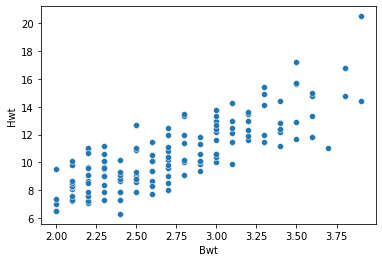

In [14]:
# scatterplot of original bwt and hwt
sns.scatterplot(data = df_cats, x = 'Bwt', y= 'Hwt')

<AxesSubplot:xlabel='random_bwt', ylabel='random_hwt'>

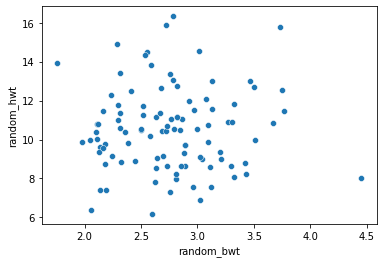

In [15]:
# scatterplot of bwt and hwt
sns.scatterplot(data = random_df, x = 'random_bwt', y= 'random_hwt')

As we can see, there appears to be a positive correlation between a cat's bodyweight and heartweight, whereas in the random dataframe there is little correlation. Thsi can also be shown numerically. 

In [16]:
# Show the correlation bodyweight and heartweight
df_cats.corr()

,Bwt,Hwt
Bwt,1.000000,0.804127
Hwt,0.804127,1.000000


In [17]:
# Show the correlation bodyweight and heartweight
random_df.corr()

,random_bwt,random_hwt
random_bwt,1.000000,0.019211
random_hwt,0.019211,1.000000


This means that in general, lighter cats have lighter hearts and heavier cats have heavier hearts. While 0.8 is a very strong correlation[x], it is not perfect. There are some rather rare instances where a cat has a heavier heart than another cat that have a higher bodyweight. For that reason, it will not suffice to just sort the random values so that the lightest cat is matched with the lightest heart all the way up to the heaviest cat and the heaviest heart.  

Since the data appears to be correlated, one potential solution is to assume that the data is normally distributed and then use numpy random's multivariate_normal method, which samples from multiple correlated normal distributions given the mean of the normal distributions and their covariance matrix.

In [18]:
# Create a df containing only the numerical bwt and hwt columns
df_cats_num = df_cats[['Bwt', 'Hwt']]

In [19]:
# Get covariance matrix of dataframe
df_cats_num.cov()

,Bwt,Hwt
Bwt,0.235523,0.950113
Hwt,0.950113,5.927451


In [20]:
# Generate multivariate random data based on the original df mean and covariance
mean = [2.723611, 10.630556]
cov = [[0.235523, 0.950113], [0.950113, 5.927451]]
size = 200

cats_mvn = rng.multivariate_normal(mean, cov, size)

In [21]:
# Convert random array to pandas df
df_cats_mvn = pd.DataFrame(cats_mvn, columns = ['Bwt', 'Hwt'])

In [22]:
# View description of random dataset
df_cats_mvn.describe()

,Bwt,Hwt
count,200.000000,200.000000
mean,2.690309,10.459662
std,0.483840,2.434967
min,1.261357,5.442668
25%,2.341779,8.772470
50%,2.701826,10.310965
75%,3.011708,12.076855
max,3.992983,16.522552


<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

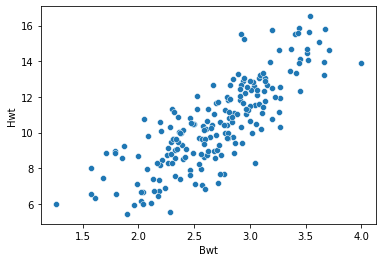

In [23]:
# Plot multivariate random data
sns.scatterplot(data = df_cats_mvn, x = 'Bwt', y= 'Hwt')

This random data certainly appears to be more in line with the original dataset. We could split the data above and below 3.0 and assign a sex of male or female to the data below 3.0 and all male to the data above 3.0, akin to the original dataset. It might be worthwhile however to dive even deeper and see if there's a difference between the sexes that would be obscured by randomly generating both sexes at once as is done here.  

As the sex of the cat may impact the other variables, it would be a good idea to also look at the summary statistics for each sex. The idea to use both groupby and describe in the same line of code came from https://stackoverflow.com/questions/42579148/get-columns-describe-from-group-by.

In [24]:
# View summary statistics for each sex
df_cats.groupby(['Sex']).describe()

Bwt                                                 Hwt             \
    count      mean       std  min   25%  50%  75%  max count       mean   
Sex                                                                        
F    47.0  2.359574  0.273988  2.0  2.15  2.3  2.5  3.0  47.0   9.202128   
M    97.0  2.900000  0.467484  2.0  2.50  2.9  3.2  3.9  97.0  11.322680   

                                            
          std  min   25%   50%   75%   max  
Sex                                         
F    1.357666  6.3  8.35   9.1  10.1  13.0  
M    2.542288  6.5  9.40  11.4  12.8  20.5

The standard deviations of the male values for body weight and heart weight are much higher than for females, suggesting there is typically a greater variation in male sizes, whereas females tend to be more similar in body and heart weights to one another. 

It it will be helpful to plot the dataset to visualise the distributions of each variable. It will help to decide if the assumption of normally distributed data is justified. 

<AxesSubplot:xlabel='Bwt', ylabel='Count'>

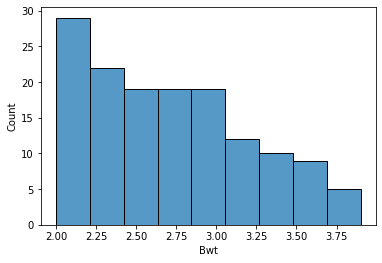

In [25]:
# Plotting the body weight
sns.histplot(data = df_cats, x = 'Bwt')

<AxesSubplot:xlabel='Bwt', ylabel='Count'>

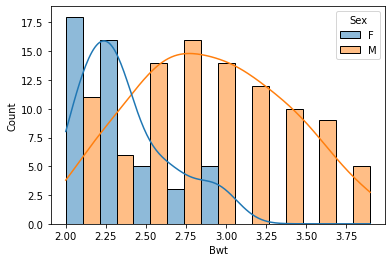

In [26]:
# Plotting the bodyweight by sex
sns.histplot(data = df_cats, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)

<AxesSubplot:xlabel='Hwt', ylabel='Count'>

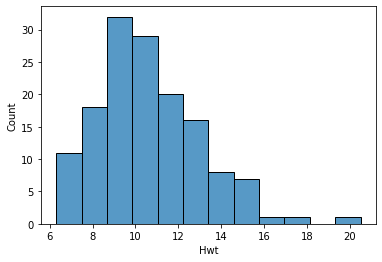

In [27]:
# Plotting the heart weight
sns.histplot(data = df_cats, x = 'Hwt')

<AxesSubplot:xlabel='Hwt', ylabel='Count'>

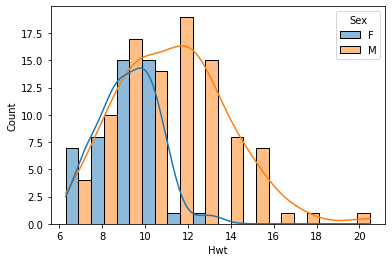

In [28]:
# Plotting the heart weight by sex
sns.histplot(data = df_cats, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)

Both the summary statistics and the plots suggest that sex has an influence over the distribution of the variables. 
The male datapoints appear to come close to the bell-shaped curve of a normal distribution, whereas the female datapoints seem to skew slightly.

It might be a good idea to create two new dataframes containing the data for each sex.

In [29]:
# https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
# New df for each sex
df_cats_female = df_cats.loc[df_cats['Sex'] == 'F']
df_cats_male = df_cats.loc[df_cats['Sex'] == 'M']

In [30]:
df_cats_female.corr()

,Bwt,Hwt
Bwt,1.00000,0.53205
Hwt,0.53205,1.00000


In [31]:
df_cats_male.corr()

,Bwt,Hwt
Bwt,1.00000,0.79303
Hwt,0.79303,1.00000


It is interesting to note that while both males and females have a strong positive correlation between bodyweight and heartweight, the correlation is much higher in males than females.

We can use a statistical test for normality. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/ recommends using Shapiro–Wilk test when sample sizes are under 50, which is the case with female samples. It can also be used for samples above 50, however, so it can also be used to test the male data also.

The Shapiro-Wilk tests a null hypothesis that the data comes from a normal distribution. If the p-value is greater that 0.05, then the test fails to reject that null hypothesis. 

In [32]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test on male body weight
shapiro(df_cats_male['Bwt'])

ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)

In [33]:
#perform Shapiro-Wilk test on male heart weight
shapiro(df_cats_male['Hwt'])

ShapiroResult(statistic=0.9772655963897705, pvalue=0.09039346873760223)

In [34]:
#perform Shapiro-Wilk test on female body weight
shapiro(df_cats_female['Bwt'])

ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)

In [35]:
#perform Shapiro-Wilk test on female heart weight
shapiro(df_cats_female['Hwt'])

ShapiroResult(statistic=0.9787967205047607, pvalue=0.5434856414794922)

These test results suggest that we can assume that male body weights, heart weights, and female heart weights were drawn from a normal distribution. However, the p-value for female body weights suggests that we can assume that this data is not normally distributed. This is unusual, as weights are often normally distributed[x]. This may be a false result due to the low sample size https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/ 

For now, we will proceed as before and use numpy random's multivariate normal to generate data for each sex and see if it will generate a sample that sufficiently simulates the original.

In [36]:
# Generate random data for female cats
# Get covariance matrix for female cats
df_cats_female.cov()

,Bwt,Hwt
Bwt,0.075069,0.197914
Hwt,0.197914,1.843256


In [37]:
# Generate multivariate random data based on the original female df mean and covariance
mean_f = [2.359574, 9.202128]
cov_f = [[0.075069, 0.197914], [0.197914, 1.843256]]
size_f = 100

female_cats_mvn = rng.multivariate_normal(mean, cov, size)

In [38]:
# Convert random array to pandas df
df_female_cats_mvn = pd.DataFrame(female_cats_mvn, columns = ['Bwt', 'Hwt'])

In [39]:
df_female_cats_mvn.describe()

,Bwt,Hwt
count,200.000000,200.000000
mean,2.712683,10.441264
std,0.473681,2.399812
min,1.491332,4.069209
25%,2.398186,8.753659
50%,2.673018,10.416007
75%,3.010240,12.188408
max,4.073439,17.428950


In [40]:
# Add a column with sex of female
df_female_cats_mvn['Sex'] = 'F'

In [41]:
# View dataframe
df_female_cats_mvn

,Bwt,Hwt,Sex
0,2.443301,10.230715,F
1,2.412691,7.741395,F
2,2.609000,11.198781,F
3,3.504683,16.212305,F
4,2.411962,13.402982,F
...,...,...,...
195,3.263683,12.932252,F
196,3.135646,12.422708,F
197,2.505695,9.834411,F
198,2.546921,8.342498,F


In [42]:
# Generate random data for male cats
# Get covariance matrix for male cats
df_cats_male.cov()

,Bwt,Hwt
Bwt,0.218542,0.94250
Hwt,0.942500,6.46323


In [43]:
# Generate multivariate random data based on the original male df mean and covariance
mean_m = [2.900000, 11.322680]
cov_m = [[0.218542, 0.94250], [0.942500, 6.46323]]
size_m = 200 # Increased size vs female as original had more males than females

male_cats_mvn = rng.multivariate_normal(mean, cov, size)

In [44]:
# Convert random array to pandas df
df_male_cats_mvn = pd.DataFrame(male_cats_mvn, columns = ['Bwt', 'Hwt'])

In [45]:
df_male_cats_mvn.describe()

,Bwt,Hwt
count,200.000000,200.000000
mean,2.673927,10.431972
std,0.492896,2.381175
min,1.512569,4.423158
25%,2.349462,8.880550
50%,2.642378,10.229334
75%,2.979107,11.918122
max,4.045226,16.844460


In [46]:
# Add a column with sex of female
df_male_cats_mvn['Sex'] = 'M'

In [47]:
# View dataframe
df_male_cats_mvn

,Bwt,Hwt,Sex
0,2.310157,9.960437,M
1,1.962345,10.076222,M
2,2.392056,7.449093,M
3,2.745830,11.041333,M
4,2.680189,8.082526,M
...,...,...,...
195,2.568642,9.431852,M
196,2.640643,11.004520,M
197,2.611926,10.476593,M
198,2.637750,7.697425,M


In [48]:
# ConCAT male and female dfs
all_cats_mvn = pd.concat([df_female_cats_mvn, df_male_cats_mvn])

In [49]:
# Round the values of the random df to one decimal place as with the original dataset
all_cats_mvn = all_cats_mvn.round(1)

In [50]:
# Move Sex column to the front as with original dataset
# # https://stackoverflow.com/questions/25122099/move-column-by-name-to-front-of-table-in-pandas
sex = all_cats_mvn['Sex']
all_cats_mvn.drop(labels=['Sex'], axis=1,inplace = True)
all_cats_mvn.insert(0, 'Sex', sex)
all_cats_mvn

,Sex,Bwt,Hwt
0,F,2.4,10.2
1,F,2.4,7.7
2,F,2.6,11.2
3,F,3.5,16.2
4,F,2.4,13.4
...,...,...,...
195,M,2.6,9.4
196,M,2.6,11.0
197,M,2.6,10.5
198,M,2.6,7.7


In [51]:
all_cats_mvn.describe()

,Bwt,Hwt
count,400.000000,400.000000
mean,2.695500,10.434000
std,0.482921,2.388505
min,1.500000,4.100000
25%,2.400000,8.800000
50%,2.700000,10.350000
75%,3.000000,12.025000
max,4.100000,17.400000


<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

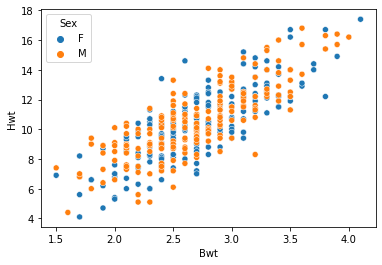

In [52]:
# scatterplot of original bwt and hwt
sns.scatterplot(data = all_cats_mvn, x = 'Bwt', y= 'Hwt', hue = 'Sex')

In [53]:
all_cats_mvn.corr()

,Bwt,Hwt
Bwt,1.000000,0.802297
Hwt,0.802297,1.000000


Let's remind ourselves of the descriptive statistics, scatterplot, and correlation of the original dataset for comparison.

In [54]:
df_cats.describe()

,Bwt,Hwt
count,144.000000,144.000000
mean,2.723611,10.630556
std,0.485307,2.434636
min,2.000000,6.300000
25%,2.300000,8.950000
50%,2.700000,10.100000
75%,3.025000,12.125000
max,3.900000,20.500000


<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

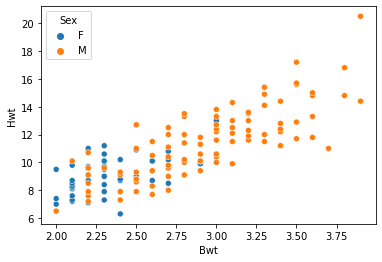

In [55]:
# scatterplot of original bwt and hwt
sns.scatterplot(data = df_cats, x = 'Bwt', y= 'Hwt', hue='Sex')

In [56]:
df_cats.corr()

,Bwt,Hwt
Bwt,1.000000,0.804127
Hwt,0.804127,1.000000


We have A wider range of values for cats with the random dataset, which is to be expected. As the amount samples taken from a normal distribution increases, the chances of getting more extreme values from the distribution also increases [x]. The random sample have thrown up cats that are lighter than 2kg, and females heavier than 3kg, both of which were absent from the original dataset. 

The dataset now needs more variables to meet the criteria for the assignment. Two new columns will now be randomly generated for the dataset. The first will be a unique ID for each sample, and the second will be to give each cat a name. 

In [57]:
# Variables to be used in generating the correct id numbers
count = all_cats_mvn['Bwt'].count()
possible_id = np.arange(100000,1000000)

In [58]:
# Generate random 6 digit IDs
cat_id = rng.choice(possible_id, size=count, replace=False)

In [59]:
# Add ID to df and move ID to be first column
all_cats_mvn['ID'] = cat_id
all_cats_mvn.drop(labels=['ID'], axis=1,inplace = True)
all_cats_mvn.insert(0, 'ID', cat_id)

In [60]:
all_cats_mvn

,ID,Sex,Bwt,Hwt
0,252902,F,2.4,10.2
1,678342,F,2.4,7.7
2,187050,F,2.6,11.2
3,650863,F,3.5,16.2
4,744517,F,2.4,13.4
...,...,...,...,...
195,580975,M,2.6,9.4
196,257415,M,2.6,11.0
197,287379,M,2.6,10.5
198,923024,M,2.6,7.7


A column of cat names will now be generated. A zip file containing a txt file with cat names was retreived from https://www.kessels.com/CatNames/. This txt file will be used to generate random names for the cats in the random dataset.  

In [ ]:
'''
# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats_random_'  + current_time + '.csv'

# Save pandas data frame to disk.
all_cats_mvn.to_csv(path)
'''

### Generating random data using Copulas - https://sdv.dev/Copulas/tutorials/00_Quickstart.html

In [61]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()

In [62]:
df_test = df_cats[['Bwt', 'Hwt']]

In [63]:
copula.fit(df_test)

C:\Users\disco\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\disco\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\disco\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\disco\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [64]:
num_samples = 1000

synthetic_data = copula.sample(num_samples)
synthetic_data

,Bwt,Hwt
0,3.234400,11.245782
1,2.096631,11.004209
2,3.648761,15.350572
3,2.317755,7.890794
4,3.797119,16.591965
...,...,...
995,2.582141,10.012217
996,2.187806,8.367497
997,3.523989,13.164910
998,2.146363,9.749860


In [65]:
synthetic_data.describe()

,Bwt,Hwt
count,1000.000000,1000.000000
mean,2.714127,10.570481
std,0.480519,2.476545
min,2.002872,5.914481
25%,2.316799,8.725357
50%,2.658009,10.097174
75%,3.037987,12.060215
max,3.896863,21.786612
